[FUENTE DE INFORMACION: DETECCION DE ENFERMEDAD DE LA TIROIDES - url: (https://archive.ics.uci.edu/ml/datasets/thyroid+disease)](https://archive.ics.uci.edu/ml/datasets/thyroid+disease)


<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)
1. [Estudiando el conjunto de Datos](#estudiando-los-datos)
    1. [Graficando las clases](#grafico-clases)
1. [Aplicando SMOTE](#aplicando-smote)

<a id='estudiando-los-datos'></a>
## ESTUDIANDO LOS DATOS
[Inicio ▲](#Indice)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import smote_variants as sv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)
data = pd.read_csv("hypothyroid.csv")
print(data.head())
print(data.describe().T)
print(data.info())
print(data)

  age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U measured   T4U FTI measured  FTI TBG measured

In [4]:
# Vemos el tamaño de las clases. 
data["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [5]:
# Convertimos variables nominas a numericas 0 y 1
data["binaryClass"]=data["binaryClass"].map({"P":0,"N":1})

In [6]:
# lo mismo hacemos con las variables: pregnant, sex
data["pregnant"].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [7]:
data=data.replace({"t":1,"f":0})

In [8]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,0
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,0
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,0
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,0
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,0


In [9]:
data['sex'].isnull().sum()

0

In [10]:
data["TBG"].value_counts()

?    3772
Name: TBG, dtype: int64

In [11]:
del data["TBG"]

In [12]:
data=data.replace({"?":np.NAN})

In [13]:
data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [14]:
data["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [15]:
data=data.replace({"F":1,"M":0})

In [16]:
data["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [17]:
del data["referral source"]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [19]:
data["T3 measured"].value_counts()

1    3003
0     769
Name: T3 measured, dtype: int64

In [20]:
data["TT4 measured"].value_counts()


1    3541
0     231
Name: TT4 measured, dtype: int64

In [21]:
data["FTI measured"].value_counts()

1    3387
0     385
Name: FTI measured, dtype: int64

In [22]:
data["TBG measured"].value_counts()

0    3772
Name: TBG measured, dtype: int64

In [23]:
data["binaryClass"].value_counts()

0    3481
1     291
Name: binaryClass, dtype: int64

In [24]:
data.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [25]:
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [26]:
data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [27]:
data['T4U measured'].mean()

0.8974019088016967

In [28]:
data['T4U measured'].fillna(data['T4U measured'].mean(), inplace=True)
data['sex'].fillna(data['sex'].mean(), inplace=True)
data['age'].fillna(data['age'].mean(), inplace=True)

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['TSH'] = imputer.fit_transform(data[['TSH']])
data['T3'] = imputer.fit_transform(data[['T3']])
data['TT4'] = imputer.fit_transform(data[['TT4']])
data['T4U'] = imputer.fit_transform(data[['T4U']])
data['FTI'] = imputer.fit_transform(data[['FTI']])
data.isnull().sum()


age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [30]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3772.0,51.735879,20.082295,1.000,36.00,54.0000,67.00,455.00
sex,3772.0,0.684705,0.455362,0.000,0.00,1.0000,1.00,1.00
on thyroxine,3772.0,0.123012,0.328494,0.000,0.00,0.0000,0.00,1.00
query on thyroxine,3772.0,0.013256,0.114382,0.000,0.00,0.0000,0.00,1.00
on antithyroid medication,3772.0,0.011400,0.106174,0.000,0.00,0.0000,0.00,1.00
sick,3772.0,0.038971,0.193552,0.000,0.00,0.0000,0.00,1.00
pregnant,3772.0,0.014051,0.117716,0.000,0.00,0.0000,0.00,1.00
thyroid surgery,3772.0,0.014051,0.117716,0.000,0.00,0.0000,0.00,1.00
I131 treatment,3772.0,0.015642,0.124101,0.000,0.00,0.0000,0.00,1.00
query hypothyroid,3772.0,0.062036,0.241253,0.000,0.00,0.0000,0.00,1.00


In [33]:
import seaborn as sns

In [34]:
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

<a id='grafico-clases'></a>
## Grafico de Clases
[Inicio ▲](#Indice)

Text(0.5, 1.0, 'Distribucion de clases sin aplicar SMOTE')

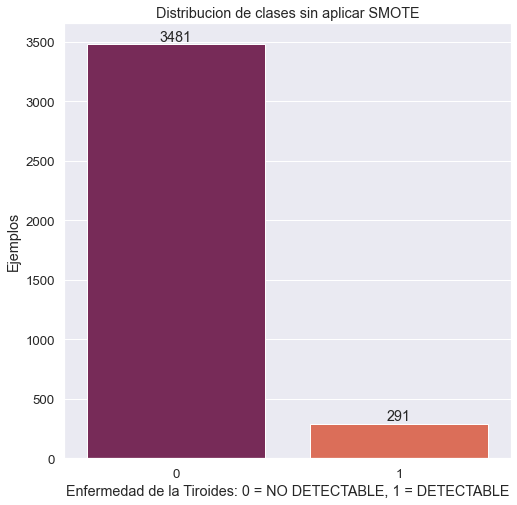

In [35]:
ax =  sns.countplot(x='binaryClass', data=data, palette='rocket')

abs_values = data['binaryClass'].value_counts(ascending=False).values

ax.set_ylabel('Ejemplos')
ax.set_xlabel('Enfermedad de la Tiroides: 0 = NO DETECTABLE, 1 = DETECTABLE')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Distribucion de clases sin aplicar SMOTE')

In [38]:
X, y = data.drop(['binaryClass'], axis=1), data['binaryClass']

In [39]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25)
# clasifier = RandomForestClassifier(random_state=42, n_estimators=100)
clasifier= GaussianNB()
# fit the model
print('100% del conjunto: ' + str(len(X)))
print('25% test: '+ str(len(y_test)))

clasifier.fit(X_train,y_train)
y_pred=clasifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

def calculoF1_score(cm):
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    return (2*TP)/((2*TP)+FP+FN)

print('Calculo del F1 Score es: ', calculoF1_score(cm))


100% del conjunto: 3772
25% test: 943
Confusion matrix

 [[232 628]
 [  0  83]]
Calculo del F1 Score es:  0.20906801007556675


<a id='aplicando-smote'></a>
## Aplicando SMOTE
[Inicio ▲](#Indice)

In [42]:
oversampler= sv.SMOTE()
# oversampler= sv.SMOTE_IPF()
# oversampler= sv.SMOTE_ENN()
# oversampler= sv.SMOTE_TomekLinks()
classifier= GaussianNB()
# classifier= RandomForestClassifier(random_state=42, n_estimators=100)
model= Pipeline([
                ('scale', StandardScaler()),
                ('clf', sv.OversamplingClassifier(oversampler, classifier))
            ])
model.fit(X_train, y_train)
param_grid= {'clf__oversampler':[sv.distance_SMOTE(proportion=0.2),
                                 sv.distance_SMOTE(proportion=0.3),
                                 sv.distance_SMOTE(proportion=0.4),
                                 sv.distance_SMOTE(proportion=0.5),
                                 sv.distance_SMOTE(proportion=0.6),
                                 sv.distance_SMOTE(proportion=0.7),
                                 sv.distance_SMOTE(proportion=0.8),
                                 sv.distance_SMOTE(proportion=0.9),
                                 sv.distance_SMOTE(proportion=1.0)]}
scoring = {"recall": "recall", "precision": "precision", "f1" : "f1"}
grid= GridSearchCV(model, param_grid= param_grid, cv= 3, n_jobs= 1, verbose= 2, scoring= scoring, refit='recall' ) #probar con lista ['f1','recall','precision']
grid.fit(X_train, y_train)

2022-09-28 22:01:29,803:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:29,838:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:29,877:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:29,910:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:29,958:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-09-28 22:01:29,996:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,036:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,087:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,137:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,179:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.3, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.4, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-09-28 22:01:30,236:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,290:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,341:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,395:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,448:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.6, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-09-28 22:01:30,503:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,557:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,625:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,682:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.7, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-09-28 22:01:30,742:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,803:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,889:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:30,954:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.8, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-09-28 22:01:31,019:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:31,087:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:31,155:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 0.9, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s
[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


2022-09-28 22:01:31,225:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2022-09-28 22:01:31,304:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


[CV] END clf__oversampler=('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}"); total time=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE object at 0x00000223922E8190>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x00000223954DF8E0>,
                                              <smote_variants._smote_varian...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x0000022395627790>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)

<a id='resultados-smote'></a>
## Evaluando los resultados de SMOTE
[Inicio ▲](#Indice)

In [43]:
print(grid.best_params_['clf__oversampler'])

datos = {'Recall' : grid.cv_results_['mean_test_recall'],
         'Precision' : grid.cv_results_['mean_test_precision'],
         'F1' : grid.cv_results_['mean_test_f1']}

df = pd.DataFrame(datos)

print(grid.get_params)
print(df)

y_pred = grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


# print('PERFORMANCE MEJOR ESTIMADOR: ' , grid.best_estimator_.score(X_test, y_test))

def calculoF1_score(cm):
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    return (2*TP)/((2*TP)+FP+FN)

print('Calculo del F1 Score es: ', calculoF1_score(cm))

('distance_SMOTE', "{'proportion': 0.2, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
<bound method BaseEstimator.get_params of GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        OversamplingClassifier(classifier=GaussianNB(),
                                                               oversampler=<smote_variants._smote_variants.SMOTE object at 0x00000223922E8190>))]),
             n_jobs=1,
             param_grid={'clf__oversampler': [<smote_variants._smote_variants.distance_SMOTE object at 0x00000223954DF8E0>,
                                              <smote_variants._smote_varian...
                                              <smote_variants._smote_variants.distance_SMOTE object at 0x0000022395627790>]},
             refit='recall',
             scoring={'f1': 'f1', 'precision': 'precision', 'recall': 'recall'},
             verbose=2)>
     R